In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


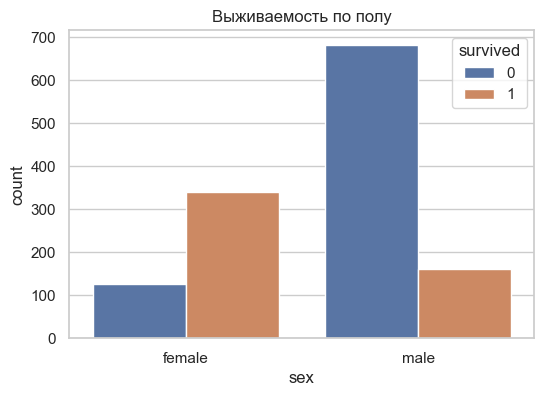

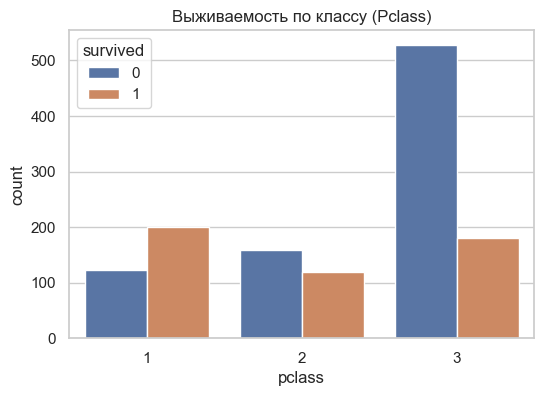

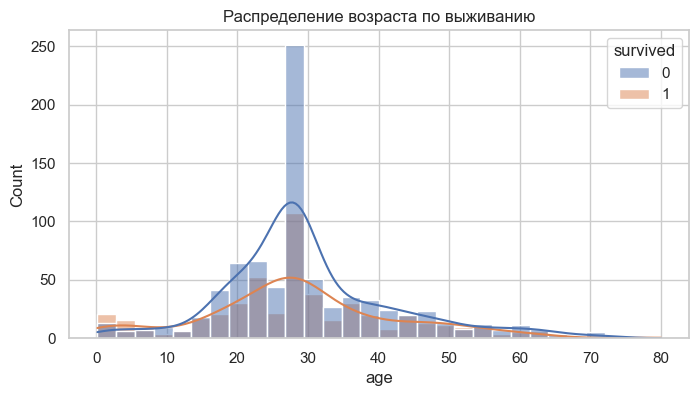

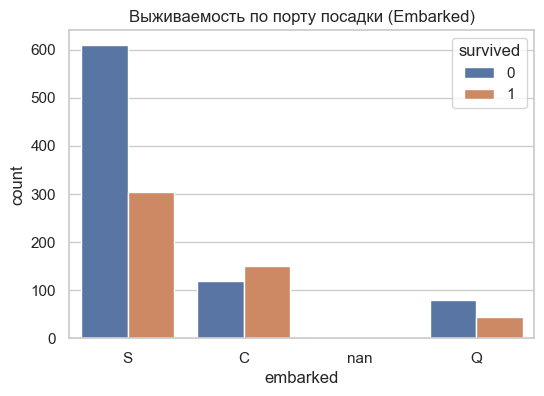

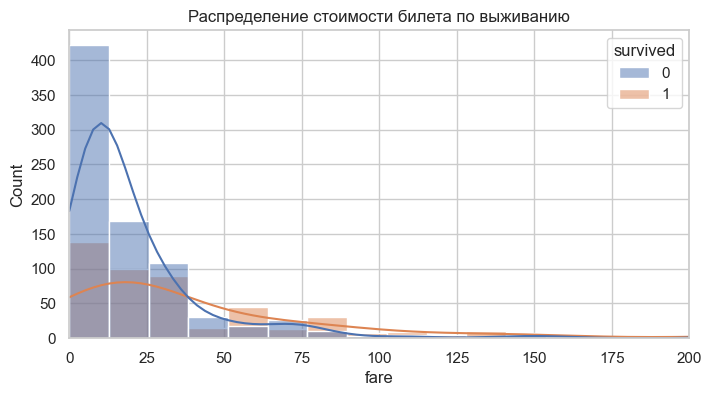

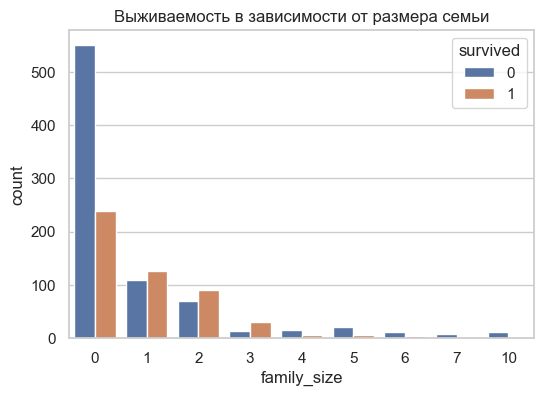

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV-файла
df = pd.read_csv("/Users/danilmoiseenko/Programming/summerPractice/Lesson_2/data/titanic.csv")

# Обработка пропущенных значений:
# - Заполняем пропуски в возрасте медианой возраста
df['age'] = df['age'].fillna(df['age'].median())
# - Заполняем пропуски в стоимости билета медианой стоимости
df['fare'] = df['fare'].fillna(df['fare'].median())
# Приводим типы столбцов к строкам, чтобы корректно использовать их в визуализациях
df['sex'] = df['sex'].astype(str)
df['embarked'] = df['embarked'].astype(str)

# Устанавливаем стиль для графиков (белая сетка)
sns.set(style="whitegrid")

# 1. График: Распределение выживших по полу
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex", hue="survived")
plt.title("Выживаемость по полу")
plt.savefig("Lesson_2/plots/sex_survival.png")  # Сохраняем график в файл
plt.show()

# 2. График: Распределение выживших по пассажирскому классу (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="pclass", hue="survived")
plt.title("Выживаемость по классу (Pclass)")
plt.savefig("Lesson_2/plots/pclass_survival.png")
plt.show()

# 3. График: Распределение возраста среди выживших и невыживших (гистограмма + KDE)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="age", hue="survived", kde=True, bins=30)
plt.title("Распределение возраста по выживанию")
plt.savefig("Lesson_2/plots/age_survival.png")
plt.show()

# 4. График: Выживаемость в зависимости от порта посадки (Embarked)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="embarked", hue="survived")
plt.title("Выживаемость по порту посадки (Embarked)")
plt.savefig("Lesson_2/plots/embarked_survival.png")
plt.show()

# 5. График: Распределение стоимости билета (fare) среди выживших и невыживших
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="fare", hue="survived", bins=40, kde=True)
plt.title("Распределение стоимости билета по выживанию")
plt.xlim(0, 200)  # Ограничиваем ось X для лучшей читаемости графика
plt.savefig("Lesson_2/plots/fare_survival.png")
plt.show()

# 6. Создаем новый признак — размер семьи на борту (количество родственников)
df['family_size'] = df['sibsp'] + df['parch']

# График: Выживаемость в зависимости от размера семьи
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="family_size", hue="survived")
plt.title("Выживаемость в зависимости от размера семьи")
plt.savefig("Lesson_2/plots/family_survival.png")
plt.show()


In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Отбор числовых признаков
numeric_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
X_numeric = df[numeric_cols]

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_numeric)

# Получим имена новых признаков
poly_feature_names = poly.get_feature_names_out(numeric_cols)

# Соберём новый DataFrame с полиномиальными признаками
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Добавим целевую переменную обратно
df_poly['survived'] = df['survived']

# Просмотр результата
print("Размерность исходных числовых данных:", X_numeric.shape)
print("Размерность после расширения:", df_poly.shape)
print(df_poly.head())

# Выбор числовых признаков (без целевой переменной)
numeric_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
df_numeric = df[numeric_cols]

# Добавление статистических признаков по строкам
df['feature_mean'] = df_numeric.mean(axis=1)
df['feature_var'] = df_numeric.var(axis=1)
df['feature_max'] = df_numeric.max(axis=1)
df['feature_min'] = df_numeric.min(axis=1)
df['feature_sum'] = df_numeric.sum(axis=1)

# Проверка результата
print(df[['feature_mean', 'feature_var', 'feature_max', 'feature_min', 'feature_sum']].head())

Размерность исходных числовых данных: (1309, 5)
Размерность после расширения: (1309, 21)
   pclass    age  sibsp  parch      fare  pclass^2  pclass age  pclass sibsp  \
0     1.0  29.00    0.0    0.0  211.3375       1.0       29.00           0.0   
1     1.0   0.92    1.0    2.0  151.5500       1.0        0.92           1.0   
2     1.0   2.00    1.0    2.0  151.5500       1.0        2.00           1.0   
3     1.0  30.00    1.0    2.0  151.5500       1.0       30.00           1.0   
4     1.0  25.00    1.0    2.0  151.5500       1.0       25.00           1.0   

   pclass parch  pclass fare  ...  age sibsp  age parch   age fare  sibsp^2  \
0           0.0     211.3375  ...       0.00       0.00  6128.7875      0.0   
1           2.0     151.5500  ...       0.92       1.84   139.4260      1.0   
2           2.0     151.5500  ...       2.00       4.00   303.1000      1.0   
3           2.0     151.5500  ...      30.00      60.00  4546.5000      1.0   
4           2.0     151.5500  ...  

In [13]:
df.to_csv('/Users/danilmoiseenko/Programming/summerPractice/Lesson_2/data/processed_titanic.csv', index=False)

In [14]:
df.shape

(1309, 20)